## [**I. Importing RawDATA**](#step1)
- [**I.1. RawData folder Info**](#step11) 	

- [**I.2. Define import acc file **](#step12) 



## [**II. Signal Processing PipeLine**](#step2) 

### [**II.1. Generating time domain signals**](#step32)         
- [**Step 0: Define visualize_signal (visualization function)**](#step322) 
		

#### [**II.1.1. Median Filtering**](#step323)
- [**Step 1: Define Median Filter 3rd Order Funtion**](#step3232)	
- [**Step 2: Apply the Median Filter and visualize its effects on one signal**](#step3233)
			

#### [**II.1.2. Useful Components Selection**](#step324)

- [**Step 1: Define components_selection_one_signal**](#step3242)

- [**Step 2: Test on a sample**](#step3243)

- [**Step 3: Verify Gravity**](#step3244)    
    - [**1.** Define verify gravity function](#step32442) 
    - [**2.** Gravity visualization](#step32443)
    - [**3.** Discussion](#step32444)
		

#### [**II.1.3. Jerks and Magnitudes**](#step325)
- [**Define jerking and magnitude functions**](#step3252) 
		

#### [**II.1.4. Time domain signals generation**](#step326)
- [**Time domain signals generation PipeLine**](#step3261)
- [**Display a dataframe**](#step3262) 
	


### [**II.2. Windowing**](#step33)
[**Step 0: Define supplementery functions**](#step332)
		
#### [**II.2.1. Windowing type 1**](#step333)
- [**Step 1: Define Windowing type 1 function**](#step3332)
- [**Step 2: Windows type I Generation and Storage**](#step3333)
- [**Display samples & Discussion**](#step3334) 
		
#### [**II.2.2. Windowing type 2**](#step334)
- [**Step 1: Define the Voting function**](#step3342)
- [**Step 2: Define Windowing type II** ](#step3344)
- [**Step 3: Windows type II Generation and Storage**](#step3345)
- [**Display Samples & Discussion**](#step3346)
		
#### [**III.2.3. Frequency Windows Generation**](#step335)
- [**Step 1: Define fast_fourier_transform functions**](#step3352) 
- [**Step 2: Apply it to one sample**](#step3353)
- [**Step 3: Generation and Storage of Frequency Windows**](#step3354)
- [**Discussion**](#step3355)

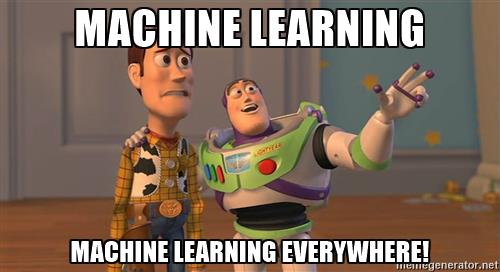

In [1]:
from IPython.display import Image
display(Image('https://raw.githubusercontent.com/anisayari/your_first_machine_learning_project/master/images/machine-learning-everywhere.jpg', width=500, unconfined=True))

In [117]:
# Import default_timer to compute durations
from timeit import default_timer as timer
start_time=timer()

In [118]:
# Importing numpy 
import numpy as np

# Importing os 

import os

# Importing Scipy 
import scipy as sp

# Importing Pandas Library 
import pandas as pd

# import glob function to scrap files path
from glob import glob

# import display() for better visualitions of DataFrames and arrays
from IPython.display import display

# import pyplot for plotting
import matplotlib.pyplot as plt

# import seaborn for plotting
import seaborn as sns

plt.style.use('bmh') # for better plots

<a id='step11'></a>
### I.1. RawData folder Info

* **Step 00:** Use "*glob*" function to scrap all files path in "RawData" folder and store it in a list called **Raw_data_paths**.

In [119]:
os.getcwd()

'C:\\Users\\BADOHOUN\\Datascience'

In [120]:
####################### Scraping RawData files paths########################
Raw_data_paths = sorted(glob("C:\\Users\\BADOHOUN\\Datascience/*"))
Raw_data_paths

['C:\\Users\\BADOHOUN\\Datascience\\BADOHOUN-IDIR(2).pdf',
 'C:\\Users\\BADOHOUN\\Datascience\\BADOHOUN-IDIR.Rmd',
 'C:\\Users\\BADOHOUN\\Datascience\\Demo_websocket_chat_python.py',
 'C:\\Users\\BADOHOUN\\Datascience\\Finish_apr_project.ipynb',
 'C:\\Users\\BADOHOUN\\Datascience\\PROJETLOGICIELSSTATISTIQUE.docx',
 'C:\\Users\\BADOHOUN\\Datascience\\Projet Analyse de donnees Massives.zip',
 'C:\\Users\\BADOHOUN\\Datascience\\Projet_BigData.tar.gz',
 'C:\\Users\\BADOHOUN\\Datascience\\Projetdonnéessas.txt',
 'C:\\Users\\BADOHOUN\\Datascience\\README.md',
 'C:\\Users\\BADOHOUN\\Datascience\\Reconnaissance_automatique_des_Caractères .html',
 'C:\\Users\\BADOHOUN\\Datascience\\Series_Temporelles.ipynb',
 'C:\\Users\\BADOHOUN\\Datascience\\Untitled.ipynb',
 'C:\\Users\\BADOHOUN\\Datascience\\accelerometer_iphone.csv',
 'C:\\Users\\BADOHOUN\\Datascience\\client_stack.py',
 'C:\\Users\\BADOHOUN\\Datascience\\données projet sas.txt',
 'C:\\Users\\BADOHOUN\\Datascience\\projetannexes SAS.txt',


<a id='step11'></a>
### I.2. Define import acc file 

* Data Exploration 

In [121]:
os.getcwd()

'C:\\Users\\BADOHOUN\\Datascience'

In [122]:
data = pd.read_csv('C:\\Users\\BADOHOUN\\Documents\\Evenements_sur_la_route\\accelerometer.csv')
data.columns = ['dateentry' , 'deviceid' , 'acc_x' , 'acc_y' , 'acc_z' , 'gyro_x' , 'gyro_y' , 'gyro_z' , 'date']
data = data.iloc[:,0:8]

display(data.head(3) , data.shape)




,dateentry,deviceid,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,1575206301795,0123456789ABCDEF#41552778,1.419379,0.155464,-0.234596,-1.734596,-0.107646,-1.098461
1,1575206301816,0123456789ABCDEF#41552778,1.338618,0.116307,-0.213998,-1.729320,-0.085587,-1.114619
2,1575206301835,0123456789ABCDEF#41552778,1.191371,0.111412,-0.095099,-1.650451,-0.092951,-1.062897


(3532666, 8)

In [123]:
tel_supportfixe = data[data.deviceid == 'unknown_1563053406#ANONYMOUSTOKEN2536']



display(tel_supportfixe.shape)


(214745, 8)

In [193]:
tel_supportfixe['label'] = 'Fixe'

C:\Users\BADOHOUN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
data2 = pd.read_csv("C://Users//BADOHOUN//Documents//Evenements_sur_la_route/accelerometer_dataavant.csv" ,  encoding = 'utf-8' , engine = 'python', error_bad_lines=False)
data2.columns = ['dateentry' , 'deviceid' , 'acc_x' , 'acc_y' , 'acc_z' , 'gyro_x' , 'gyro_y' , 'gyro_z' , 'date']
data2 = data2.iloc[:,0:8]

display(data2.head(3) , data2.shape)

Skipping line 6951: unexpected end of data


,dateentry,deviceid,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,1552653444888,f029dee2,1.024691,-0.144292,0.160593,-1.415338,0.138230,-1.805494
1,1552673661030,f029dee2,-0.149559,0.335411,1.074495,0.138302,-0.299854,2.036234
2,1552504977082,f029dee2,-0.755412,-1.399552,0.506707,0.979959,0.994468,2.110143


(6949, 8)

In [195]:
data2['label'] = 'Pas_Fixe'

In [199]:
fixe_dataavant_avec_label.head()

,dateentry,deviceid,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,1552653444888,f029dee2,1.024691,-0.144292,0.160593,-1.415338,0.138230,-1.805494,Pas_Fixe
1,1552673661030,f029dee2,-0.149559,0.335411,1.074495,0.138302,-0.299854,2.036234,Pas_Fixe
2,1552504977082,f029dee2,-0.755412,-1.399552,0.506707,0.979959,0.994468,2.110143,Pas_Fixe
3,1552653445001,f029dee2,0.966862,-0.167962,0.150834,-1.416041,0.169986,-1.788067,Pas_Fixe
4,1552673661107,f029dee2,-0.132481,0.283562,1.028624,0.128089,-0.266890,2.082162,Pas_Fixe


In [212]:
display(data2.shape , tel_supportfixe.shape)

(6949, 9)

(214745, 9)

In [216]:
tel_supportfixe = tel_supportfixe.iloc[0:6949,:]
tel_supportfixe.shape

(6949, 9)

In [279]:
fixe_dataavant_avec_label.label

0         Pas_Fixe
1         Pas_Fixe
2         Pas_Fixe
3         Pas_Fixe
4         Pas_Fixe
5         Pas_Fixe
6         Pas_Fixe
7         Pas_Fixe
8         Pas_Fixe
9         Pas_Fixe
10        Pas_Fixe
11        Pas_Fixe
12        Pas_Fixe
13        Pas_Fixe
14        Pas_Fixe
15        Pas_Fixe
16        Pas_Fixe
17        Pas_Fixe
18        Pas_Fixe
19        Pas_Fixe
20        Pas_Fixe
21        Pas_Fixe
22        Pas_Fixe
23        Pas_Fixe
24        Pas_Fixe
25        Pas_Fixe
26        Pas_Fixe
27        Pas_Fixe
28        Pas_Fixe
29        Pas_Fixe
            ...   
347016        Fixe
347017        Fixe
347018        Fixe
347019        Fixe
347020        Fixe
347021        Fixe
347022        Fixe
347023        Fixe
347024        Fixe
347025        Fixe
347026        Fixe
347027        Fixe
347028        Fixe
347029        Fixe
347030        Fixe
347031        Fixe
347032        Fixe
347033        Fixe
347034        Fixe
347035        Fixe
347036        Fixe
347037      

In [277]:
fixe_dataavant_avec_label = pd.concat([data2 , tel_supportfixe])
fixe_dataavant = fixe_dataavant_avec_label[['acc_x' , 'acc_y' , 'acc_z' , 'gyro_x' , 'gyro_y' , 'gyro_z']]
display(fixe_dataavant.head() , fixe_dataavant.shape)

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,1.024691,-0.144292,0.160593,-1.415338,0.138230,-1.805494
1,-0.149559,0.335411,1.074495,0.138302,-0.299854,2.036234
2,-0.755412,-1.399552,0.506707,0.979959,0.994468,2.110143
3,0.966862,-0.167962,0.150834,-1.416041,0.169986,-1.788067
4,-0.132481,0.283562,1.028624,0.128089,-0.266890,2.082162


(13898, 6)

# Do you understand what we have to do ?

In [218]:
display(fixe_dataavant.head() , fixe_dataavant.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13898 entries, 0 to 347045
Data columns (total 6 columns):
acc_x     13898 non-null float64
acc_y     13898 non-null float64
acc_z     13898 non-null float64
gyro_x    13898 non-null float64
gyro_y    13898 non-null float64
gyro_z    13898 non-null float64
dtypes: float64(6)
memory usage: 760.0 KB


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,1.024691,-0.144292,0.160593,-1.415338,0.138230,-1.805494
1,-0.149559,0.335411,1.074495,0.138302,-0.299854,2.036234
2,-0.755412,-1.399552,0.506707,0.979959,0.994468,2.110143
3,0.966862,-0.167962,0.150834,-1.416041,0.169986,-1.788067
4,-0.132481,0.283562,1.028624,0.128089,-0.266890,2.082162


None

In [219]:
fixe_dataavant.isna().sum()

acc_x     0
acc_y     0
acc_z     0
gyro_x    0
gyro_y    0
gyro_z    0
dtype: int64

<a id='step3'></a>
# II. Signal Processing PipeLine
- [**Info**](#step31)

## [**II.1. Generating time domain signals**](#step32)

## [**II.2. Windowing**](#step33) 

## [**II.3. Features Generation**](#step34)

<a id='step32'></a>
## II.1 Generating time domain signals
#### [**II.1.1. Median Filtering**](#step323)
#### [**II.1.2. Useful Components Selection**](#step324)
#### [**II.1.3. Jerks and Magnitudes**](#step325)
#### [**II.1.4. Time domain signals generation**](#step326)

- **Info**

<a id='step322'></a>
- **Step 0:** Define visualize_signal (visualization function)

In [386]:
def visualize_signal(signal,x_labels,y_labels,title,legend):
    # Inputs: signal: 1D column 
    #         x_labels: the X axis info (figure)
    #         y_labels: the Y axis info (figure)
    #         title: figure's title
    #         legend : figure's legend
    
    
    sampling_freq = 10
    # Define the figure's dimensions
    plt.figure(figsize=(20,4))
    
    # convert row numbers in time durations
    time=[1/float(sampling_freq) *i for i in range(len(signal))]
    
    # plotting the signal
    plt.plot(time,signal,label=legend) # plot the signal and add the legend
    
    plt.xlabel(x_labels) # set the label of x axis in the figure
    plt.ylabel(y_labels) # set the label of y axis in the figure
    plt.title(title) # set the title of the figure
    plt.legend(loc="upper left") # set the legend in the upper left corner

<a id='step323'></a>
### II.1.1. Median Filtering (3rd order)
#### [**Step 1: Define Median Filter 3rd Order Funtion**](#step3232)	
#### [**Step 2: Apply the Median Filter and visualize its effects on one signal**](#step3233)

<a id='step3231'></a>
- Info

<a id='step3232'></a>
#### Step1: Define a 3rd Order Median Filter  Funtion 

In [387]:
# The last value is not changed 
# The first value is the median of signal[0:3]
# The second value is the median of signal[0:3]
# The third value is the median of signal[1:4]

# The value before the last is the median of signal[-3:]
# The last value is last value in the original signal
from scipy.signal import medfilt # import the median filter function

def median(signal):# input: numpy array 1D (one column)
    array=np.array(signal)   
    #applying the median filter
    med_filtered=sp.signal.medfilt(array, kernel_size=3) # applying the median filter order3(kernel_size=3)
    return  med_filtered # return the med-filtered signal: numpy array 1D

<a id='step3233'></a>
#### Step 2: Apply the median filter to one signal (vector) and visualize the filter's effects   

* X-axis acceleration

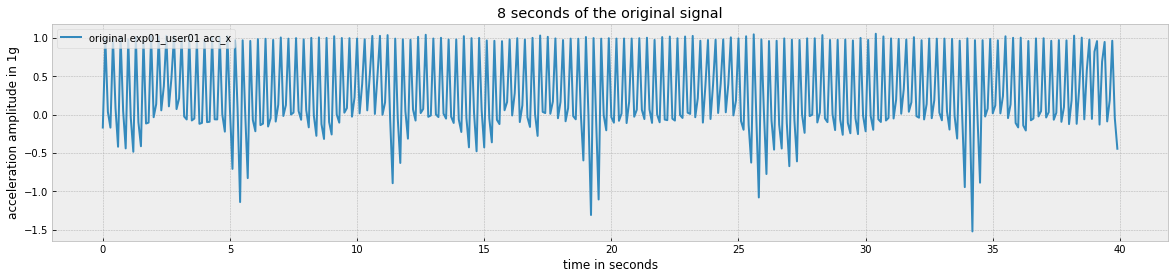

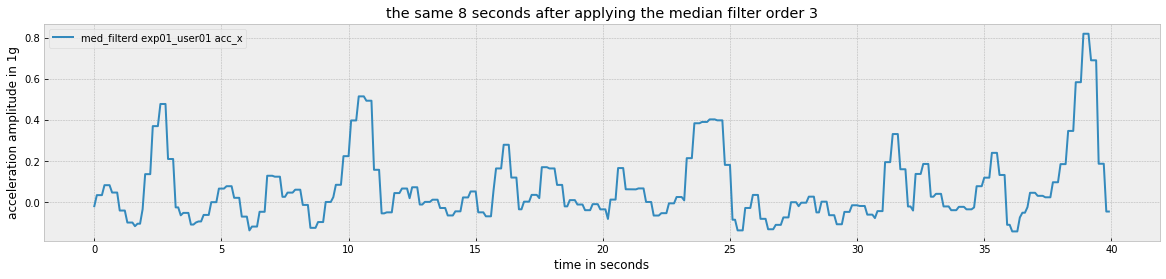

In [388]:
# testing the filter to see its effects on signals
signal_sample=np.array(fixe_dataavant['acc_x']) # selecting the signal to be filtered in this case :exp01_user01 acc_X
med_filtred_signal=median(signal_sample) # generating the filtered signal

# set figures' legends, x labels, y labels and titles
legend1='original exp01_user01 acc_x'
legend2='med_filterd exp01_user01 acc_x'
x_labels='time in seconds'
y_labels='acceleration amplitude in 1g'
title1='8 seconds of the original signal'
title2='the same 8 seconds after applying the median filter order 3'

# skip the first 500 rows (10 seconds) visualize the next 400 rows (8 seconds) for both signals (the original and the filtred ones)
visualize_signal(signal_sample[500:900],x_labels,y_labels,title1,legend1) 
visualize_signal(med_filtred_signal[500:900],x_labels,y_labels,title2,legend2)

* Y-axis acceleration 

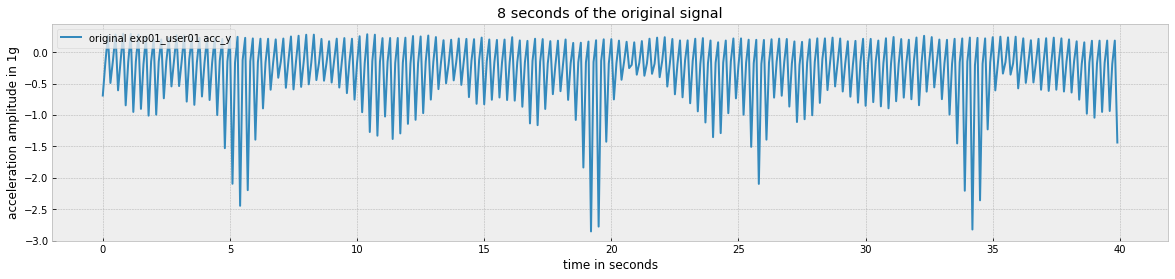

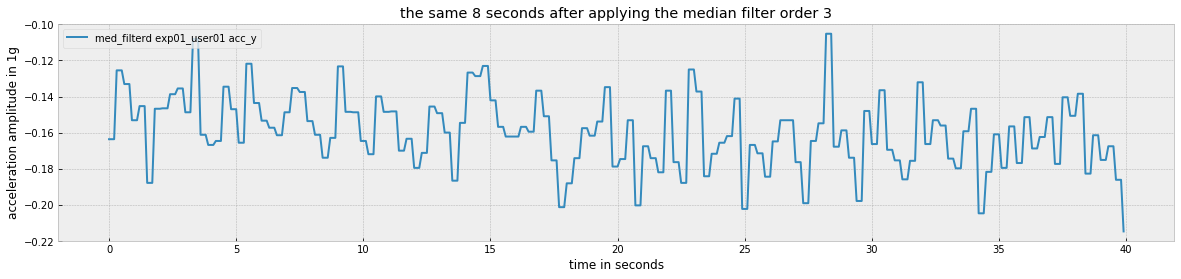

In [389]:
# testing the filter to see its effects on signals
signal_sample=np.array(fixe_dataavant['acc_y']) # selecting the signal to be filtered in this case :exp01_user01 acc_X
med_filtred_signal=median(signal_sample) # generating the filtered signal

# set figures' legends, x labels, y labels and titles
legend1='original exp01_user01 acc_y'
legend2='med_filterd exp01_user01 acc_y'
x_labels='time in seconds'
y_labels='acceleration amplitude in 1g'
title1='8 seconds of the original signal'
title2='the same 8 seconds after applying the median filter order 3'

# skip the first 500 rows (10 seconds) visualize the next 400 rows (8 seconds) for both signals (the original and the filtred ones)
visualize_signal(signal_sample[500:900],x_labels,y_labels,title1,legend1) 
visualize_signal(med_filtred_signal[500:900],x_labels,y_labels,title2,legend2)

* Z-axis

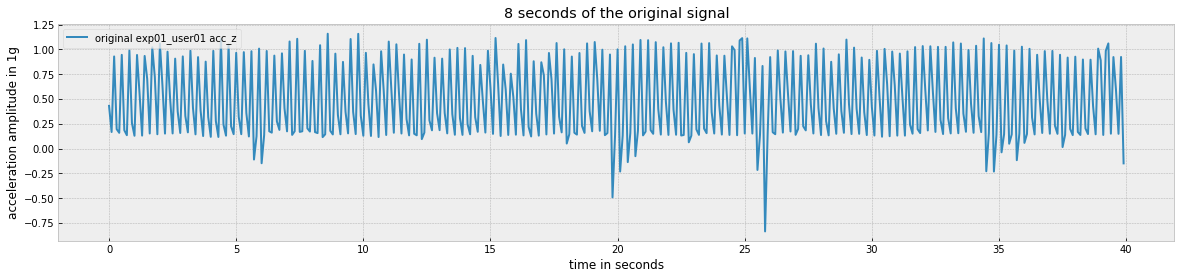

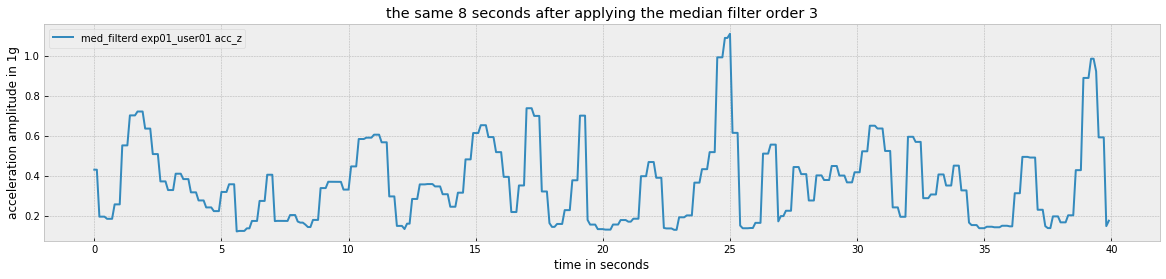

In [390]:
# testing the filter to see its effects on signals
signal_sample=np.array(fixe_dataavant['acc_z']) # selecting the signal to be filtered in this case :exp01_user01 acc_X
med_filtred_signal=median(signal_sample) # generating the filtered signal

# set figures' legends, x labels, y labels and titles
legend1='original exp01_user01 acc_z'
legend2='med_filterd exp01_user01 acc_z'
x_labels='time in seconds'
y_labels='acceleration amplitude in 1g'
title1='8 seconds of the original signal'
title2='the same 8 seconds after applying the median filter order 3'

# skip the first 500 rows (10 seconds) visualize the next 400 rows (8 seconds) for both signals (the original and the filtred ones)
visualize_signal(signal_sample[500:900],x_labels,y_labels,title1,legend1) 
visualize_signal(med_filtred_signal[500:900],x_labels,y_labels,title2,legend2)

<a id='step3234'></a>
#### Discussion

<a id='step324'></a>       
### II.1.2 Useful Components Selection

#### [**Step 1: Define components_selection_one_signal**](#step3242)
#### [**Step 2: Test on a sample**](#step3243)

#### [**Step 3: Verify Gravity**](#step3244) 

<a id='step3241'></a>
- **Info**

<a id='step3242'></a>
#### Step 1: Define components_selection_one_signal


In [381]:
# necessary functions
from scipy.fftpack import fft   # import fft(Fast Fourier Transform) function to convert a signal from time domain to 
#                               frequency domain (output :is a numpy array contains signal's amplitudes of each frequency component)

from scipy.fftpack import fftfreq # import fftfreq function to generate frequencies related to frequency components 
#                                   mentioned above
from scipy.fftpack import ifft # import ifft function (inverse fft) inverse the conversion

import math # import math library
############################## Constants #############################
sampling_freq = 10
nyq=sampling_freq/float(2) # nyq is the nyquist frequency equal to the half of the sampling frequency[10/2= 5 Hz]

freq1 = 0.3 # freq1=0.3 hertz [Hz] the cuttoff frequency between the DC compoenents [0,0.3]
#           and the body components[0.3,20]hz
freq2 = 20  # freq2= 20 Hz the cuttoff frequcency between the body components[0.3,20] hz
#             and the high frequency noise components [20,25] hz



# Function name: components_selection_one_signal

# Inputs: t_signal:1D numpy array (time domain signal); 

# Outputs: (total_component,t_DC_component , t_body_component, t_noise) 
#           type(1D array,1D array, 1D array)

# cases to discuss: if the t_signal is an acceleration signal then the t_DC_component is the gravity component [Grav_acc]
#                   if the t_signal is a gyro signal then the t_DC_component is not useful
# t_noise component is not useful
# if the t_signal is an acceleration signal then the t_body_component is the body's acceleration component [Body_acc]
# if the t_signal is a gyro signal then the t_body_component is the body's angular velocity component [Body_gyro]

def components_selection_one_signal(t_signal,freq1,freq2):
    t_signal=np.array(t_signal)
    t_signal_length=len(t_signal) # number of points in a t_signal
    
    # the t_signal in frequency domain after applying fft
    f_signal=fft(t_signal) # 1D numpy array contains complex values (in C)
    
    # generate frequencies associated to f_signal complex values
    freqs=np.array(sp.fftpack.fftfreq(t_signal_length, d=1/float(sampling_freq))) # frequency values between [-25hz:+25hz]
    
    # DC_component: f_signal values having freq between [-0.3 hz to 0 hz] and from [0 hz to 0.3hz] 
    #                                                             (-0.3 and 0.3 are included)
    
    # noise components: f_signal values having freq between [-25 hz to 20 hz[ and from ] 20 hz to 25 hz] 
    #                                                               (-25 and 25 hz inculded 20hz and -20hz not included)
    
    # selecting body_component: f_signal values having freq between [-20 hz to -0.3 hz] and from [0.3 hz to 20 hz] 
    #                                                               (-0.3 and 0.3 not included , -20hz and 20 hz included)
    
    
    f_DC_signal=[] # DC_component in freq domain
    f_body_signal=[] # body component in freq domain numpy.append(a, a[0])
    f_noise_signal=[] # noise in freq domain
    
    for i in range(len(freqs)):# iterate over all available frequencies
        
        # selecting the frequency value
        freq=freqs[i]
        
        # selecting the f_signal value associated to freq
        value= f_signal[i]
        
        # Selecting DC_component values 
        if abs(freq)>0.3:# testing if freq is outside DC_component frequency ranges
            f_DC_signal.append(float(0)) # add 0 to  the  list if it was the case (the value should not be added)                                       
        else: # if freq is inside DC_component frequency ranges 
            f_DC_signal.append(value) # add f_signal value to f_DC_signal list
    
        # Selecting noise component values 
        if (abs(freq)<=20):# testing if freq is outside noise frequency ranges 
            f_noise_signal.append(float(0)) # # add 0 to  f_noise_signal list if it was the case 
        else:# if freq is inside noise frequency ranges 
            f_noise_signal.append(value) # add f_signal value to f_noise_signal

        # Selecting body_component values 
        if (abs(freq)<=0.3 or abs(freq)>20):# testing if freq is outside Body_component frequency ranges
            f_body_signal.append(float(0))# add 0 to  f_body_signal list
        else:# if freq is inside Body_component frequency ranges
            f_body_signal.append(value) # add f_signal value to f_body_signal list
    
    ################### Inverse the transformation of signals in freq domain ########################
    # applying the inverse fft(ifft) to signals in freq domain and put them in float format
    t_DC_component= ifft(np.array(f_DC_signal)).real
    t_body_component= ifft(np.array(f_body_signal)).real
    t_noise=ifft(np.array(f_noise_signal)).real
    
    total_component=t_signal-t_noise # extracting the total component(filtered from noise) 
                                     #  by substracting noise from t_signal (the original signal).
    
    # return outputs mentioned earlier
    return (total_component,t_DC_component,t_body_component,t_noise) 


<a id='step3243'></a>
#### Step 2: Test it on a sample


<a id='step3244'></a>
#### Step 3: Verify Gravity Magnitudes
- [ Define verify gravity function](#step32442) 
- [Gravity visualization](#step32443)

* **Info**

- We can verify if this filtring function is correct by :
    - visualizing the gravity euclidian magnitude **grav_acc_mag** of  **[grav_acc_X,grav_acc_Y,grav_acc_Z]** 
    - the gravity magnitude should be near to 1 since the unit used to measure acceleration is 'g's.

<a id='step32442'></a>
##### 1. Define verify gravity function

In [382]:
import math
def mag_3_signals(x,y,z): # Euclidian magnitude
    return [math.sqrt((x[i]**2+y[i]**2+z[i]**2)) for i in range(len(x))]

In [383]:
def verify_gravity(exp_id):
    # inputs: exp_id integer from 1 to 61
   
    
    acc_x=np.array(tel_supportfixe['acc_x']) # copy acc_X column from dataframe in raw_dic having the key mentioned above
    acc_y=np.array(tel_supportfixe['acc_y'])# copy acc_Y column  from dataframe in raw_dic having the key mentioned above
    acc_z=np.array(tel_supportfixe['acc_z'])# copy acc_Z column  from dataframe in raw_dic having the key mentioned above

    # apply the filtering method to acc_[X,Y,Z] and store gravity components
    grav_acc_X=components_selection_one_signal(acc_x,freq1,freq2)[1] 
    grav_acc_Y=components_selection_one_signal(acc_y,freq1,freq2)[1]
    grav_acc_Z=components_selection_one_signal(acc_z,freq1,freq2)[1]
    
    # calculating gravity magnitude signal
    grav_acc_mag=mag_3_signals(grav_acc_X, grav_acc_Y,grav_acc_Z)

    x_labels='time in seconds' # Set x axis info
    y_labels='gravity amplitude in 1g' # set y axis info
    title='the euclidian magnitude of gravity 3-axial signals' # set the figure's title
    legend=' grav_acc_mag' # set the figure's legend
    
    visualize_signal(grav_acc_mag,x_labels,y_labels,title,legend) # visualize gravity magnitude signal
    print('mean value = '+str(np.array(grav_acc_mag).mean())[0:5]+ ' g') # print the gravity magnitude mean value

mean value = 1.009 g


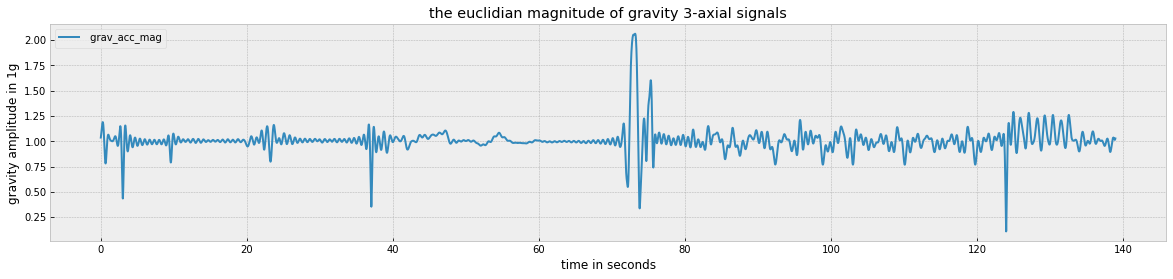

In [384]:
verify_gravity(fixe_dataavant)

<a id='step32444'></a>
##### Discussion

<a id='step325'></a>
### 3.1.3. Jerking function & Magnitude function

- [**Define jerking and magnitude functions**](#step3252)

* **Info**

<a id='step3252'></a>
##### Define jerking and magnitude functions

In [229]:
##########################################Jerk Signals Functions #####################################

# d(signal)/dt : the Derivative
# jerk(signal(x0)) is equal to (signal(x0+dx)-signal(x0))/dt
# Where: signal(x0+dx)=signal[index[x0]+1] and  signal(x0)=signal[index[x0]]


dt=0.02 # dt=1/50=0.02s time duration between two rows
# Input: 1D array with lenght=N (N:unknown)
# Output: 1D array with lenght=N-1
def jerk_one_signal(signal): 
        return np.array([(signal[i+1]-signal[i])/dt for i in range(len(signal)-1)])

################################ Magnitude Function ######################################
import math 
def mag_3_signals(x,y,z):# magnitude function redefintion
    return np.array([math.sqrt((x[i]**2+y[i]**2+z[i]**2)) for i in range(len(x))])

<a id='step326'></a>
### 3.1.5. Time domain signals generation
- [**Time domain signals generation PipeLine**](#step3261)

##### info

<a id='step3261'></a>
##### Time domain signals generation PipeLine

In [230]:
time_sig_df = pd.DataFrame() # a dataframe will contain time domain signals 
for column in fixe_dataavant.columns: # iterate over each column in fixedataavant
        t_signal=np.array(fixe_dataavant[column]) # copie the signal values in 1D numpy array
        med_filtred = median(t_signal) # apply 3rd order median filter and store the filtred signal in med_filtred 
        if 'acc' in column: # test if the med_filtred signal is an acceleration signal 
        # the 2nd output DC_component is the gravity acc 
        # The 3rd one is the body_component which in this case the body_acc
            _,grav_acc,body_acc,_=components_selection_one_signal(med_filtred,freq1,freq2) # apply components selection
            body_acc_jerk=jerk_one_signal(body_acc)# apply the jerking function to body components only
            time_sig_df['t_body_'+column]=body_acc[:-1] # t_body_acc storing with the appropriate axis selected 
            #                                             from the column name
            
            time_sig_df['t_grav_'+column]= grav_acc[:-1] # t_grav_acc_storing with the appropriate axis selected 
            #                                              from the column name
            
            # store  t_body_acc_jerk signal with the appropriate axis selected from the column name
            time_sig_df['t_body_acc_jerk_'+column[-1]]=body_acc_jerk
        elif 'gyro' in column: # if the med_filtred signal is a gyro signal
            
            # The 3rd output of components_selection is the body_component which in this case the body_gyro component
            _,_,body_gyro,_=components_selection_one_signal(med_filtred,freq1,freq2)  # apply components selection
            
            body_gyro_jerk=jerk_one_signal(body_gyro) # apply the jerking function to body components only
            
            # store signal in time_sig_dataframe and delete the last value of each column 
            # jerked signal will have the original lenght-1(due to jerking)
            
            time_sig_df['t_body_gyro_'+column[-1]]=body_gyro[:-1] # t_body_acc storing with the appropriate axis selected 
            #                                                       from the column name
            
            time_sig_df['t_body_gyro_jerk_'+column[-1]]=body_gyro_jerk # t_grav_acc_storing with the appropriate axis 
            #                                                            selected from the column name
   # all 15 axial signals generated above are reordered to facilitate magnitudes signals generation
new_columns_ordered=['t_body_acc_x','t_body_acc_y','t_body_acc_z',
                          't_grav_acc_x','t_grav_acc_y','t_grav_acc_z',
                          't_body_acc_jerk_x','t_body_acc_jerk_y','t_body_acc_jerk_z',
                          't_body_gyro_x','t_body_gyro_y','t_body_gyro_z',
                          't_body_gyro_jerk_x','t_body_gyro_jerk_y','t_body_gyro_jerk_z']
    
    # create new dataframe to order columns
ordered_time_sig_df=pd.DataFrame()
for col in new_columns_ordered: # iterate over each column in the new order
        ordered_time_sig_df[col]=time_sig_df[col] # store the column in the ordred dataframe
for i in range(0,15,3): # iterating over each 3-axial signals
    mag_col_name=new_columns_ordered[i][:-1]+'mag'# Create the magnitude column name related to each 3-axial signals
    col0=np.array(ordered_time_sig_df[new_columns_ordered[i]]) # copy X_component
    col1=ordered_time_sig_df[new_columns_ordered[i+1]] # copy Y_component
    col2=ordered_time_sig_df[new_columns_ordered[i+2]] # copy Z_component
    mag_signal=mag_3_signals(col0,col1,col2) # calculate magnitude of each signal[X,Y,Z]
    ordered_time_sig_df[mag_col_name]=mag_signal # store the signal_mag with its appropriate column name
        
       

##### Display a dataframe

In [231]:
display(ordered_time_sig_df.shape) # the of the first dataframe
display(ordered_time_sig_df.describe()) # dataframe's statistics
ordered_time_sig_df.head(3) # displaying the fisrt three rows

(13897, 20)

,t_body_acc_x,t_body_acc_y,t_body_acc_z,t_grav_acc_x,t_grav_acc_y,t_grav_acc_z,t_body_acc_jerk_x,t_body_acc_jerk_y,t_body_acc_jerk_z,t_body_gyro_x,t_body_gyro_y,t_body_gyro_z,t_body_gyro_jerk_x,t_body_gyro_jerk_y,t_body_gyro_jerk_z,t_body_acc_mag,t_grav_acc_mag,t_body_acc_jerk_mag,t_body_gyro_mag,t_body_gyro_jerk_mag
count,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000,13897.000000
mean,-0.000015,0.000020,0.000009,0.313336,0.083360,0.274257,0.001478,-0.002286,-0.000014,0.000035,-0.000025,0.000004,-0.003163,0.002700,0.000365,0.177961,0.816149,3.564802,0.723316,18.007967
std,0.142917,0.148940,0.185621,0.367950,0.609301,0.191642,3.020943,3.472128,5.620398,0.471865,0.133222,1.052257,13.998763,2.831927,40.185179,0.213053,0.239941,6.329449,0.907978,38.659069
min,-1.140002,-2.458912,-2.954109,-0.243062,-1.217402,-1.143201,-33.488558,-78.257373,-130.758039,-4.413307,-1.391789,-6.695569,-239.838574,-80.648608,-313.405379,0.001313,0.198289,0.024415,0.001485,0.072486
25%,-0.056098,-0.026124,-0.050426,-0.050160,-0.171452,0.181253,-0.526008,-0.461667,-0.624783,-0.097576,-0.027555,-0.251116,-1.281864,-0.487561,-3.118422,0.048473,0.641859,0.658739,0.146760,1.508651
50%,-0.005927,-0.000018,-0.001818,0.188256,-0.146857,0.307583,0.004043,-0.004930,0.009325,0.007126,0.000156,0.017924,-0.028728,0.007705,-0.029311,0.107395,0.941396,1.644879,0.401328,4.616972
75%,0.035682,0.027109,0.043755,0.607855,0.864293,0.378938,0.556437,0.449605,0.653414,0.138936,0.028294,0.328129,1.008914,0.505890,3.022254,0.231934,1.007343,4.011410,0.904904,15.575462
max,0.901054,1.013773,0.944326,1.058508,1.182659,0.840077,38.713275,74.749002,95.066478,4.364325,1.303435,4.207737,245.320254,89.834727,302.086989,3.432070,1.320421,143.179966,6.711489,313.820973


,t_body_acc_x,t_body_acc_y,t_body_acc_z,t_grav_acc_x,t_grav_acc_y,t_grav_acc_z,t_body_acc_jerk_x,t_body_acc_jerk_y,t_body_acc_jerk_z,t_body_gyro_x,t_body_gyro_y,t_body_gyro_z,t_body_gyro_jerk_x,t_body_gyro_jerk_y,t_body_gyro_jerk_z,t_body_acc_mag,t_grav_acc_mag,t_body_acc_jerk_mag,t_body_gyro_mag,t_body_gyro_jerk_mag
0,-0.208319,0.355284,-0.123553,0.247198,-0.451254,0.341444,-10.520776,1.520460,10.909099,0.398643,-0.409705,-0.158729,15.983118,-2.721245,73.425025,0.429987,0.617512,15.231775,0.593270,75.193746
1,-0.418734,0.385693,0.094629,0.241278,-0.444417,0.341118,2.354181,-9.022739,7.331616,0.718305,-0.464130,1.309771,-7.894271,10.153100,24.302134,0.577107,0.609986,11.861896,1.564251,27.495430
2,-0.371651,0.205238,0.241262,0.235378,-0.437571,0.340775,0.542335,4.731310,-7.177837,0.560420,-0.261068,1.795814,3.374268,-4.944682,-13.850353,0.488318,0.602494,8.613987,1.899257,15.088667


# Segmentation




Les points de données discrets produits par les capteurs sont divisés en fenêtres temporelles étiquetées 


à partir de l'activité la plus fréquente dans la fenêtre. 


Le nombre de points de données dans une fenêtre de temps, alias la taille de la fenêtre 

a un impact important sur les performances du modèle  . 

La méthode actuelle pour sélectionner la taille de la fenêtre est empirique et prend du temps: 
    
    
elle teste simplement différentes valeurs pour trouver celle optimale 

In [234]:
import glob

import pandas as pd
import numpy as np
import os, sys

sample_rate = 50  # number of observation per second based on dataset documentation

sliding_size = int(.2 * sample_rate)  # number of skipped datapoints to start next window


############################################################################################ Feature sets


def mean_crossing_rate(col):
    # col = np.array(values)
    normalized = col - col.mean()  # to make elements of array possitive or negetive
    return ((normalized[:-1] * col[1:]) < 0).sum()  # Zero-Crossing_rate


In [233]:

def FS1(window):  # only mean

    avgs = list(window.mean()[:-1])

    label = window.iloc[:, -1].mode()[0]  ## select the most frequent label as the label of the window
    avgs.append(label)
    return avgs


In [182]:
def FS2(window):  # Mean and std

    features = []
    features.append(np.array(window.mean()[:-1]))
    features.append(np.array(window.std()[:-1]))
    features = np.hstack(features).tolist()

    label = window.iloc[:, -1].mode()[0] ## select the most frequent label as the label of the window

    features.append(label)

    return features


In [235]:
def FS3(window):  # mean, std,max,min and zero-crossing-rate

    features = []
    features.append(np.array(window.mean()[:-1]))
    features.append(np.array(window.std()[:-1]))
    features.append(np.array(window.min()[:-1]))
    features.append(np.array(window.max()[:-1]))
    mean_crossing = [mean_crossing_rate(window.iloc[:, i].values) for i in range(window.shape[1] - 1)]
    features.append(np.array(mean_crossing))

    features = np.hstack(features).tolist()

    label = window.iloc[:, -1].mode()[0]  ## select the most frequent label as the label of the window
    features.append(label)
    return features


In [236]:


####################################################################################################################

def windowing_dataset(dataset, win_size, feature_extraction_function, overlap=False):
    windowed_dataset = []
    win_count = 0
    if overlap:
        step_size = sliding_size  # for Overlapping technique
    else:
        step_size = win_size  # for Non-overlapping technique

    for index in range(0, dataset.shape[0], step_size):

        start = index
        end = start + win_size

        if (end <= dataset.shape[0]):  # to assure all of windows are equal in size
            window = dataset.iloc[start:end, :].reset_index(drop=True)
            win_count = win_count + 1
            features = feature_extraction_function(window)

            windowed_dataset.append(features)

    final = pd.DataFrame(windowed_dataset)
    
    return final


In [237]:
final_df = windowing_dataset(ordered_time_sig_df , 3 , FS3 , True )

In [298]:
a = fixe_dataavant_avec_label.head(695)
b = fixe_dataavant_avec_label.tail(695)
y = pd.concat([a,b])
y.shape

(1390, 9)

In [284]:
X = final_df
y = fixe_dataavant_avec_label.label

In [286]:
y = y.iloc[1390:2780:,]

In [301]:
y = y.label

In [302]:
display(X.shape , y.shape)

(1390, 96)

(1390,)

In [303]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [304]:
from sklearn.svm import SVC

In [308]:
import xgboost as xgb



xg_boost = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=2, learning_rate=0.3, max_delta_step=1,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=280,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [310]:
xg_boost.fit(xTrain, yTrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=2, learning_rate=0.3, max_delta_step=1,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=280,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [312]:
print(xg_boost.score(xTrain, yTrain))
from sklearn import model_selection 
scores = model_selection.cross_val_score(xg_boost, xTrain, yTrain, cv=5, scoring='accuracy')
print(scores) # scores of xgboost 
print("Kfold on XGBClassifier: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

1.0
[1.         0.99487179 0.99484536 0.99484536 0.98969072]
Kfold on XGBClassifier: 0.9949 (+/- 0.0033)


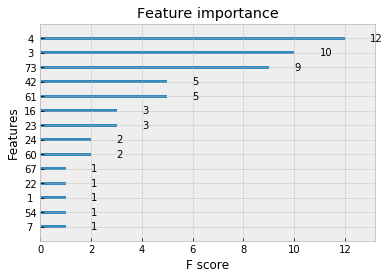

In [313]:
xgb.plot_importance(xg_boost)
plt.show()

99% de précision lors d'une validation croisée est un score correct pour le premier tir d'une classification binaire. 

Essayez d'améliorer cela! :) 

Maintenant, prédisons notre valeur de test.

In [320]:
Y_pred = xg_boost.predict(xTest)


In [318]:
submission = pd.DataFrame({ 
    "Label": Y_pred 
})
submission.head(10)

,Label
0,Pas_Fixe
1,Pas_Fixe
2,Fixe
3,Fixe
4,Pas_Fixe
5,Fixe
6,Fixe
7,Pas_Fixe
8,Pas_Fixe
9,Pas_Fixe


In [321]:

submission.to_csv('submission.csv', index=False)

In [306]:
SVMK2 = SVC(kernel='linear')
SVMK2.fit(xTrain, yTrain)
y_predict_svmk2 = SVMK2.predict(xTest)


# Des modèles de réseaux de neurones convolutifs 1D pour la reconnaissance de l'activité humaine


La reconnaissance de l'activité humaine est le problème de la classification des séquences de données d'accéléromètre enregistrées par des harnais spécialisés ou des téléphones intelligents en mouvements bien définis connus.

Les approches classiques du problème impliquent des caractéristiques artisanales à partir des données de séries chronologiques basées sur des fenêtres de taille fixe et des modèles d'apprentissage automatique de formation, tels que des ensembles d'arbres de décision. La difficulté est que cette ingénierie de fonctionnalités nécessite une expertise approfondie dans le domaine.

Récemment, il a été démontré que les méthodes d'apprentissage en profondeur telles que les réseaux de neurones récurrents et les réseaux de neurones à convolution unidimensionnels , ou CNN, fournissent des résultats de pointe sur des tâches de reconnaissance d'activité difficiles avec peu ou pas d'ingénierie des fonctionnalités de données, au lieu d'utiliser la fonctionnalité apprentissage sur données brutes.

Dans ce didacticiel, vous découvrirez comment développer des réseaux de neurones convolutifs unidimensionnels pour la classification des séries chronologiques sur le problème de la reconnaissance de l'activité humaine.

Après avoir terminé ce tutoriel, vous saurez:

Comment charger et préparer les données pour un ensemble de données standard de reconnaissance de l'activité humaine et développer un modèle CNN 1D unique qui réalise d'excellentes performances sur les données brutes.
Comment affiner davantage les performances du modèle, y compris la transformation des données, les mappes de filtres et les tailles de noyau.
Comment développer un modèle de réseau neuronal convolutionnel multidimensionnel unidirectionnel sophistiqué qui fournit un résultat semblable à un ensemble.
Découvrez comment créer des modèles de prévision de séries temporelles multivariées et en plusieurs étapes avec LSTM et plus encore dans mon nouveau livre , avec 25 didacticiels pas à pas et du code source complet.

Commençons.

Comment développer des modèles de réseaux de neurones convolutifs 1D pour la reconnaissance de l'activité humaine
Comment développer des modèles de réseaux de neurones convolutifs 1D pour la reconnaissance de l'activité humaine
Photo par Wolfgang Staudt , certains droits réservés.



Reconnaissance d'activité à l'aide d'un ensemble de données de smartphones
Développer un réseau neuronal convolutif 1D
Réseau neuronal convolutionnel 1D accordé
Réseau neuronal convolutionnel 1D multi-têtes
Reconnaissance d'activité à l'aide d'un ensemble de données de smartphones
La reconnaissance de l'activité humaine , ou HAR pour faire court, est le problème de prédire ce qu'une personne fait en fonction d'une trace de ses mouvements à l'aide de capteurs.




Les six activités réalisées étaient les suivantes:

En marchant

Accéléromètre et gyroscope de prétraitement utilisant des filtres de bruit.
Fractionnement des données en fenêtres fixes de 2,56 secondes (128 points de données) avec un chevauchement de 50%.
Division des données de l'accéléromètre en composantes gravitationnelles (totales) et mouvements corporels.
L'ingénierie des fonctionnalités a été appliquée aux données de la fenêtre et une copie des données avec ces fonctionnalités techniques a été mise à disposition.

Un certain nombre de caractéristiques temporelles et fréquentielles couramment utilisées dans le domaine de la reconnaissance de l'activité humaine ont été extraites de chaque fenêtre. Le résultat était un vecteur d'éléments de 561 éléments.

L'ensemble de données a été divisé en trains (70%) et en ensembles de tests (30%) en fonction des données des sujets, par exemple 21 sujets pour le train et neuf pour le test.

Les résultats de l'expérience avec une machine à vecteur de support destinée à être utilisée sur un smartphone (par exemple, l'arithmétique à virgule fixe) ont abouti à une précision prédictive de 89% sur l'ensemble de données de test, obtenant des résultats similaires à une implémentation SVM non modifiée.



UCI HAR Dataset.zip
Téléchargez l'ensemble de données et décompressez tous les fichiers dans un nouveau répertoire de votre répertoire de travail actuel nommé «HARDataset».

Besoin d'aide avec Deep Learning for Time Seri

Des modèles de réseaux de neurones convolutifs ont été développés pour les problèmes de classification d'images, où le modèle apprend une représentation interne d'une entrée bidimensionnelle, dans un processus appelé apprentissage des caractéristiques.

Ce même processus peut être exploité sur des séquences de données unidimensionnelles, comme dans le cas de l'accélération et des données gyroscopiques pour la reconnaissance de l'activité humaine. Le modèle apprend à extraire des caractéristiques de séquences d'observations et à mapper les caractéristiques internes à différents types d'activités.

L'avantage de l'utilisation des CNN pour la classification des séquences est qu'ils peuvent apprendre directement des données brutes des séries chronologiques et, à leur tour, ne nécessitent pas l'expertise du domaine pour concevoir manuellement les fonctionnalités d'entrée. Le modèle peut apprendre une représentation interne des données de série chronologique et atteindre idéalement des performances comparables aux modèles adaptés à une version de l'ensemble de données avec des fonctionnalités conçues.

Cette section est divisée en 4 parties; elles sont:

In [ ]:
Charger les données
Ajuster et évaluer le modèle
Résumer les résultats
Exemple complet

In [ ]:
Charger les données

La première étape consiste à charger l'ensemble de données brutes en mémoire.

Il existe trois principaux types de signaux dans les données brutes: accélération totale, accélération corporelle et gyroscope corporel. Chacun a trois axes de données. Cela signifie qu'il y a un total de neuf variables pour chaque pas de temps.

De plus, chaque série de données a été partitionnée en fenêtres superposées de 2,65 secondes de données, ou 128 pas de temps. Ces fenêtres de données correspondent aux fenêtres d'entités techniques (lignes) de la section précédente.

Cela signifie qu'une ligne de données a (128 * 9), ou 1152, éléments. C'est un peu moins du double de la taille des vecteurs d'éléments 561 dans la section précédente et il est probable qu'il existe des données redondantes.

Les signaux sont stockés dans le répertoire / Inertial Signals / sous les sous-répertoires train et test. Chaque axe de chaque signal est stocké dans un fichier séparé, ce qui signifie que chacun des ensembles de données de train et de test a neuf fichiers d'entrée à charger et un fichier de sortie à charger. Nous pouvons regrouper le chargement de ces fichiers en groupes, compte tenu des structures de répertoires cohérentes et des conventions de dénomination des fichiers.

Les données d'entrée sont au format CSV où les colonnes sont séparées par des espaces. Chacun de ces fichiers peut être chargé en tant que tableau NumPy. La fonction load_file () ci-dessous charge un ensemble de données en fonction du chemin d'accès au fichier et renvoie les données chargées sous la forme d'un tableau NumPy.

In [322]:
ordered_time_sig_df.head()

,t_body_acc_x,t_body_acc_y,t_body_acc_z,t_grav_acc_x,t_grav_acc_y,t_grav_acc_z,t_body_acc_jerk_x,t_body_acc_jerk_y,t_body_acc_jerk_z,t_body_gyro_x,t_body_gyro_y,t_body_gyro_z,t_body_gyro_jerk_x,t_body_gyro_jerk_y,t_body_gyro_jerk_z,t_body_acc_mag,t_grav_acc_mag,t_body_acc_jerk_mag,t_body_gyro_mag,t_body_gyro_jerk_mag
0,-0.208319,0.355284,-0.123553,0.247198,-0.451254,0.341444,-10.520776,1.520460,10.909099,0.398643,-0.409705,-0.158729,15.983118,-2.721245,73.425025,0.429987,0.617512,15.231775,0.593270,75.193746
1,-0.418734,0.385693,0.094629,0.241278,-0.444417,0.341118,2.354181,-9.022739,7.331616,0.718305,-0.464130,1.309771,-7.894271,10.153100,24.302134,0.577107,0.609986,11.861896,1.564251,27.495430
2,-0.371651,0.205238,0.241262,0.235378,-0.437571,0.340775,0.542335,4.731310,-7.177837,0.560420,-0.261068,1.795814,3.374268,-4.944682,-13.850353,0.488318,0.602494,8.613987,1.899257,15.088667
3,-0.360804,0.299865,0.097705,0.229501,-0.430718,0.340417,-0.361109,-2.686620,-11.751362,0.627905,-0.359961,1.518807,-1.525152,2.855405,-10.762611,0.479212,0.595040,12.059969,1.682442,11.238915
4,-0.368026,0.246132,-0.137322,0.223651,-0.423860,0.340046,1.711857,1.484266,-5.112462,0.597402,-0.302853,1.303555,-2.060788,-1.342054,-3.926458,0.463553,0.587629,5.592028,1.465560,4.633037


In [342]:
ordered_time_sig_df_train = ordered_time_sig_df.iloc[0:291837,:]

In [343]:
ordered_time_sig_df_train.shape

(13897, 20)

In [353]:
13897 * 30

416910

In [354]:
416910/100

4169.1

In [364]:
ordered_time_sig_df_train = ordered_time_sig_df.iloc[0:9728 : , ]
ordered_time_sig_df_train.shape

(9728, 20)

In [368]:
ordered_time_sig_df_test = ordered_time_sig_df.iloc[9729:13897 : , ]
ordered_time_sig_df_test.shape

(4168, 20)

In [370]:
ordered_time_sig_df_train.head(2)

,t_body_acc_x,t_body_acc_y,t_body_acc_z,t_grav_acc_x,t_grav_acc_y,t_grav_acc_z,t_body_acc_jerk_x,t_body_acc_jerk_y,t_body_acc_jerk_z,t_body_gyro_x,t_body_gyro_y,t_body_gyro_z,t_body_gyro_jerk_x,t_body_gyro_jerk_y,t_body_gyro_jerk_z,t_body_acc_mag,t_grav_acc_mag,t_body_acc_jerk_mag,t_body_gyro_mag,t_body_gyro_jerk_mag
0,-0.208319,0.355284,-0.123553,0.247198,-0.451254,0.341444,-10.520776,1.520460,10.909099,0.398643,-0.409705,-0.158729,15.983118,-2.721245,73.425025,0.429987,0.617512,15.231775,0.593270,75.193746
1,-0.418734,0.385693,0.094629,0.241278,-0.444417,0.341118,2.354181,-9.022739,7.331616,0.718305,-0.464130,1.309771,-7.894271,10.153100,24.302134,0.577107,0.609986,11.861896,1.564251,27.495430


In [375]:
total_acc_x_train = pd.DataFrame({ 
    "total_acc_x": ordered_time_sig_df_train['t_grav_acc_x']
})
total_acc_y_train = pd.DataFrame({ 
    "total_acc_y": ordered_time_sig_df_train['t_grav_acc_y']
})

total_acc_z_train = pd.DataFrame({ 
    "total_acc_z": ordered_time_sig_df_train['t_grav_acc_z']
})
total_acc_x_test = pd.DataFrame({ 
    "total_acc_x": ordered_time_sig_df_test['t_grav_acc_x']
})
total_acc_y_test = pd.DataFrame({ 
    "total_acc_y": ordered_time_sig_df_test['t_grav_acc_y']
})

total_acc_z_test = pd.DataFrame({ 
    "total_acc_z": ordered_time_sig_df_test['t_grav_acc_z']
})

In [378]:
car_acc_x_train = pd.DataFrame({ 
    "car_acc_x": ordered_time_sig_df_train['t_body_acc_x']
})
car_acc_y_train = pd.DataFrame({ 
    "car_acc_y": ordered_time_sig_df_train['t_body_acc_y']
})

car_acc_z_train = pd.DataFrame({ 
    "car_acc_z": ordered_time_sig_df_train['t_body_acc_z']
})



car_acc_x_test = pd.DataFrame({ 
    "car_acc_x": ordered_time_sig_df_test['t_body_acc_x']
})
car_acc_y_test = pd.DataFrame({ 
    "car_acc_y": ordered_time_sig_df_test['t_body_acc_y']
})

car_acc_z_test = pd.DataFrame({ 
    "car_acc_z": ordered_time_sig_df_test['t_body_acc_z']
})

In [391]:
os.getcwd()

'C:\\Users\\BADOHOUN\\Datascience'